In [123]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset and creating dataframe
train_df = pd.read_csv('/content/loan_sanction_train.csv')
test_df = pd.read_csv('/content/loan_sanction_test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_df.shape

(614, 13)

In [6]:
#checking missing values
train_df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


In [7]:
#Check for duplicate data
duplicate_data = train_df.duplicated().any()
print(duplicate_data)

False


In [8]:
#the summaried information of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#If the no. of unique values are < 20 then the variable is categorical otherwise continuous
train_df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [10]:
#Bar chart for categorical variables
def PlotBarCharts(inp, columns):
  fig, subPlot=plt.subplots(nrows=1, ncols=len(columns), figsize=(25,5))
  fig.suptitle('Bar Charts for categorical variables')

  for col, plot in zip(columns, range(len(columns))):
    inp.groupby(col).size().plot(kind='bar', ax=subPlot[plot])

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


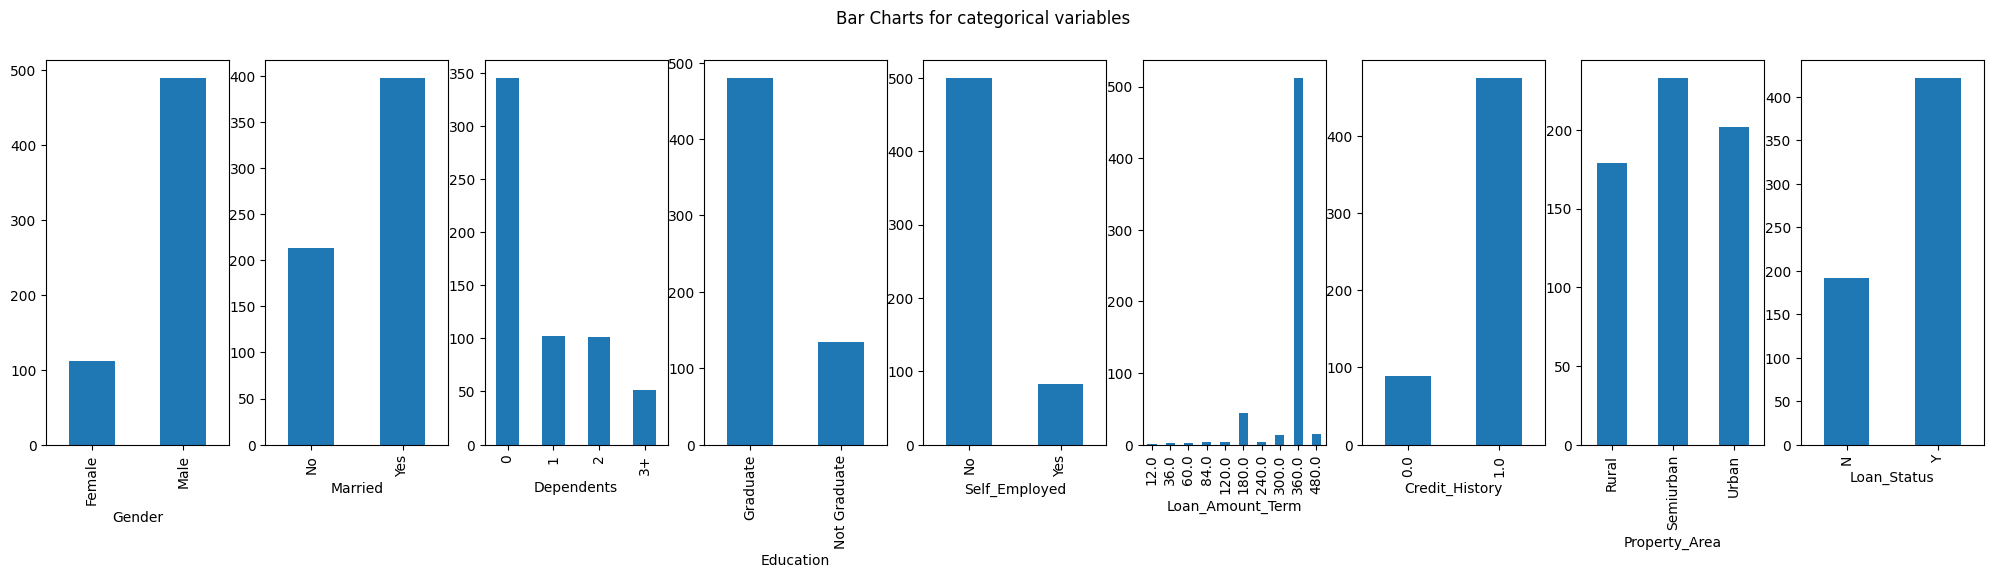

In [11]:
#Calling the function
PlotBarCharts(inp=train_df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe(include='all')

<Axes: xlabel='LoanAmount', ylabel='Count'>

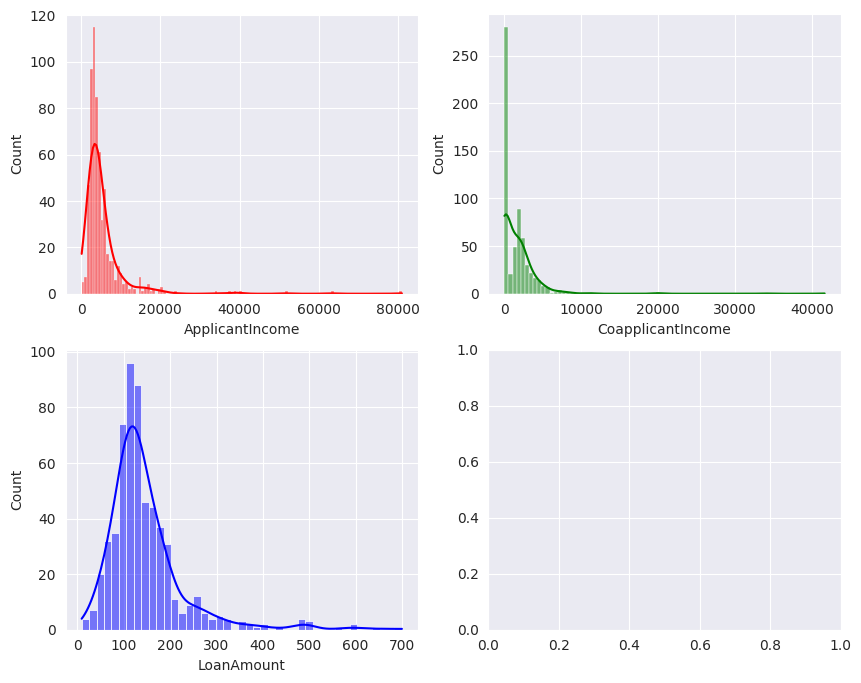

In [12]:
#Distribution of numerical variable
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=train_df, x='ApplicantIncome', kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=train_df, x='CoapplicantIncome', kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=train_df, x='LoanAmount', kde=True, ax=axs[1, 0], color='blue')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


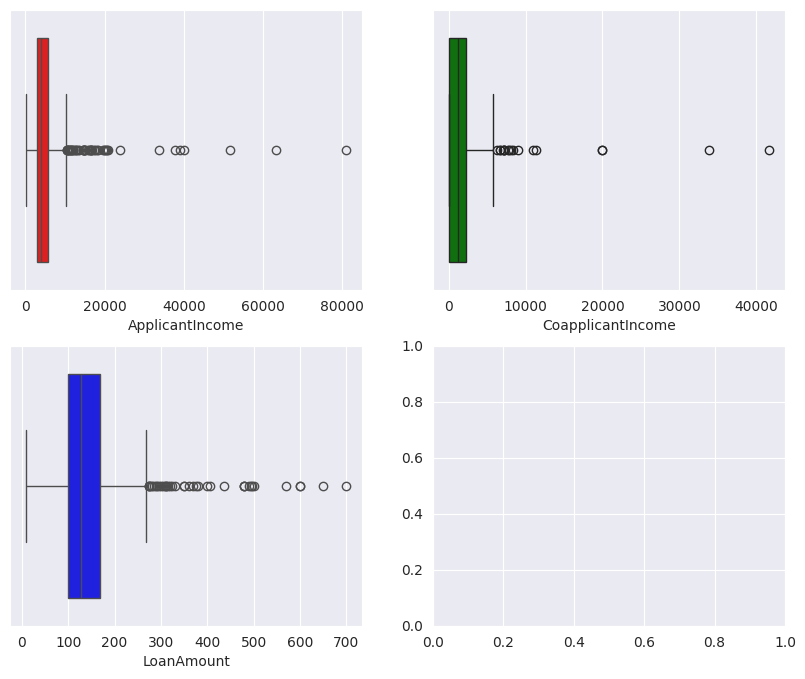

In [13]:
#Outliers
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=train_df, x='ApplicantIncome', ax=axs[0, 0], color='red')
sns.boxplot(data=train_df, x='CoapplicantIncome', ax=axs[0, 1], color='green')
sns.boxplot(data=train_df, x='LoanAmount', ax=axs[1, 0], color='blue')

train_df=train_df.drop(['Loan_ID'],axis = 1)
train_df.head()

In [14]:
#Check for missing values
train_df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
CoapplicantIncome,0
ApplicantIncome,0


In [15]:
#Replacing missing values with mode for categorical variable
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
#Check for missing values
train_df.isnull().sum().sort_values(ascending=False)

,0
LoanAmount,22
Gender,0
Dependents,0
Married,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0
Credit_History,0


In [17]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mode()[0], inplace=True)

In [18]:
#Check for missing values
train_df.isnull().sum().sort_values(ascending=False)

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [19]:
def ordinal_encoding(data=train_df, column_name='Dependents'):
  #create a dictionary to map category to its order
  category_order = { cat: i for i, cat in enumerate(train_df['Dependents'].unique())}
  #Apply the order maping to the column
  train_df['Dependents']=train_df['Dependents'].replace(category_order)
  return train_df

In [20]:
#Assuming your data is in a pandas DataFrame named data
#Apply to each ordinal column
train_df = ordinal_encoding(train_df.copy(), 'column1')

In [21]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train_df['Dependents'].unique()

array([0, 1, 2, 3])

In [23]:
#Correction heatmap
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [24]:
#Select the numerical columns from the DataFrame
num_cols = train_df[numerical_columns]

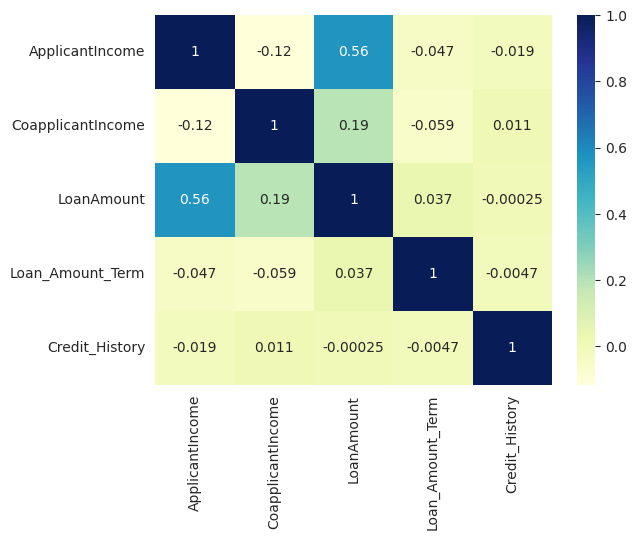

In [25]:
#Calculate the correction matrix
correlation_matrix = num_cols.corr()
dataplot = sns.heatmap(num_cols.corr(), cmap='YlGnBu', annot=True)
sns.set(rc= {'figure.figsize':(10,8)})
plt.show()

In [26]:
def iqr_outler_remove(df, numerical_columns):
  #Avoid modifying the original DataFrame
  df_filtered = train_df.copy()
  for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
      # Raise error for non-numerical columns
      raise TypeError(f"column '{col}' is not numerical.")
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered.loc[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
  return df_filtered

In [27]:
# Sample DataFrame (replace with your actual data)
data = train_df
df = pd.DataFrame(data)

In [28]:
# Sample the numerical columns for outlier removal
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [29]:
#Filter outliers
df_filtered = iqr_outler_remove(df.copy(), numerical_cols)

In [30]:
#Print the filtered DataFrame
print(df_filtered)

     Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No           0      Graduate            No             5849   
1      Male     Yes           1      Graduate            No             4583   
2      Male     Yes           0      Graduate           Yes             3000   
3      Male     Yes           0  Not Graduate            No             2583   
4      Male      No           0      Graduate            No             6000   
..      ...     ...         ...           ...           ...              ...   
608    Male     Yes           0      Graduate            No             3232   
609  Female      No           0      Graduate            No             2900   
610    Male     Yes           3      Graduate            No             4106   
612    Male     Yes           2      Graduate            No             7583   
613  Female      No           0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loa

In [31]:
df_filtered = pd.get_dummies(df_filtered)

In [32]:
#Drop columns
df_filtered = df_filtered.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis=1)

In [33]:
#Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes' : 'Married', 'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed', 'Loan_Status_Y': 'Loan_Status'}
df_filtered.rename(columns=new, inplace=True)

In [34]:
#Sqrt Transformation
df_filtered.ApplicantIncome = np.sqrt(df_filtered.ApplicantIncome)
df_filtered.CoapplicantIncome = np.sqrt(df_filtered.CoapplicantIncome)
df_filtered.LoanAmount = np.sqrt(df_filtered.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

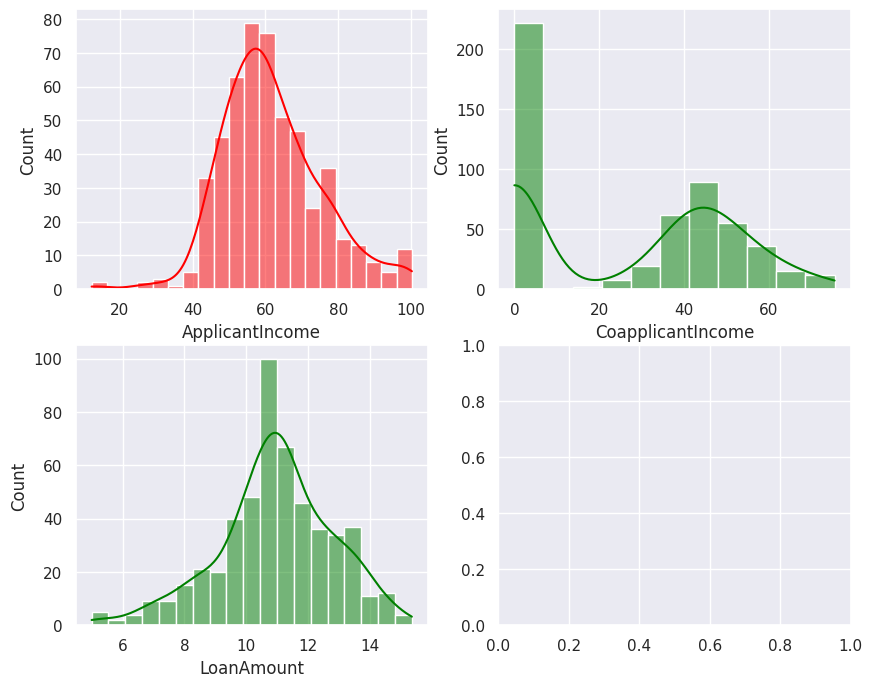

In [35]:
#Distribution of numerical variable after outlier treatment
sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(data=df_filtered, x='ApplicantIncome', kde=True, ax=axs[0, 0], color='red')
sns.histplot(data=df_filtered, x='CoapplicantIncome', kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=df_filtered, x='LoanAmount', kde=True, ax=axs[1, 0], color='green')

<Axes: xlabel='LoanAmount'>

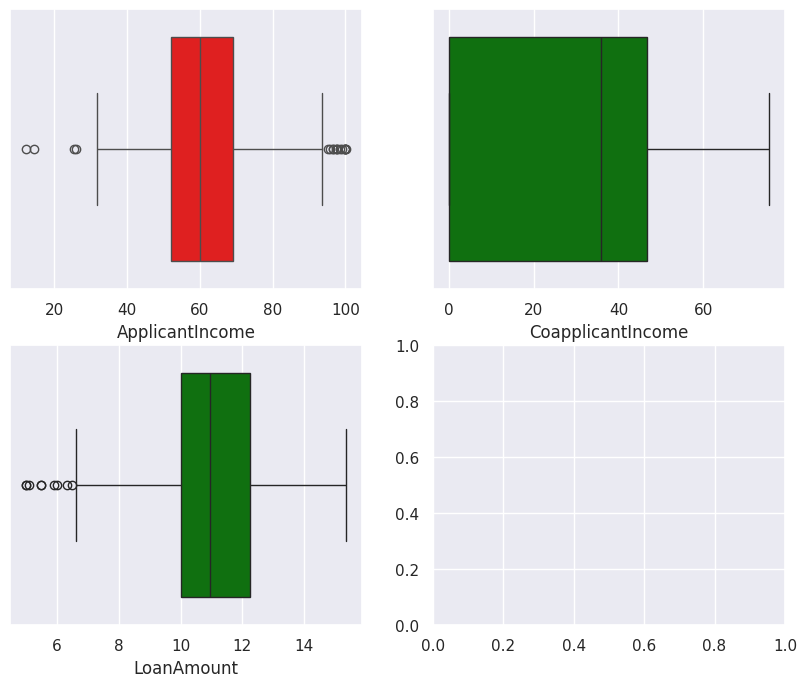

In [36]:
#check outliers after applying transformation
sns.set_style('darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df_filtered, x='ApplicantIncome', ax=axs[0, 0], color='red')
sns.boxplot(data=df_filtered, x='CoapplicantIncome', ax=axs[0, 1], color='green')
sns.boxplot(data=df_filtered, x='LoanAmount', ax=axs[1, 0], color='green')

In [37]:
x = df_filtered.drop(['Loan_Status'], axis=1)
y = df_filtered['Loan_Status']

In [38]:
#Resampling imbalanced dataset
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)

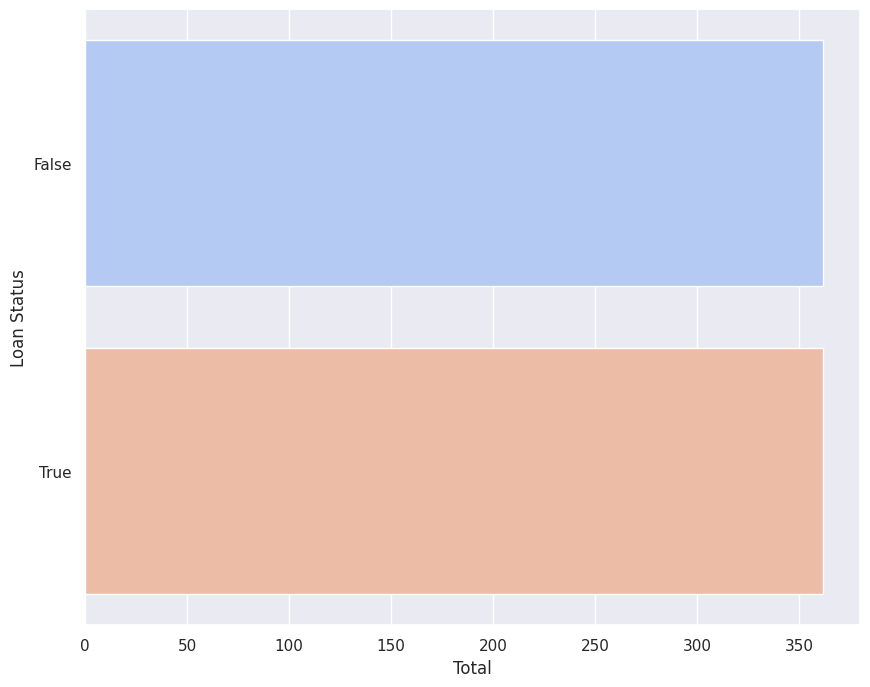

In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(y=y, data=df_filtered, palette='coolwarm')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [40]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [41]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [42]:
import os
import scipy

In [43]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
#Logistic Regression
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.69      0.80        71
        True       0.77      0.97      0.86        74

    accuracy                           0.83       145
   macro avg       0.86      0.83      0.83       145
weighted avg       0.86      0.83      0.83       145

[[49 22]
 [ 2 72]]


In [45]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_test, y_pred)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

LR accuracy: 83.45%


In [46]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 17.5 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=40

In [59]:
from interpret.glassbox import (LogisticRegression, ClassificationTree, ExplainableBoostingClassifier)

In [47]:
from interpret import show

In [49]:
scoreListknn = []
for i in range(1,21):
  KNclassifier = KNeighborsClassifier(n_neighbors=i)
  KNclassifier.fit(x_train, y_train)
  scoreListknn.append(KNclassifier.score(x_test, y_test))

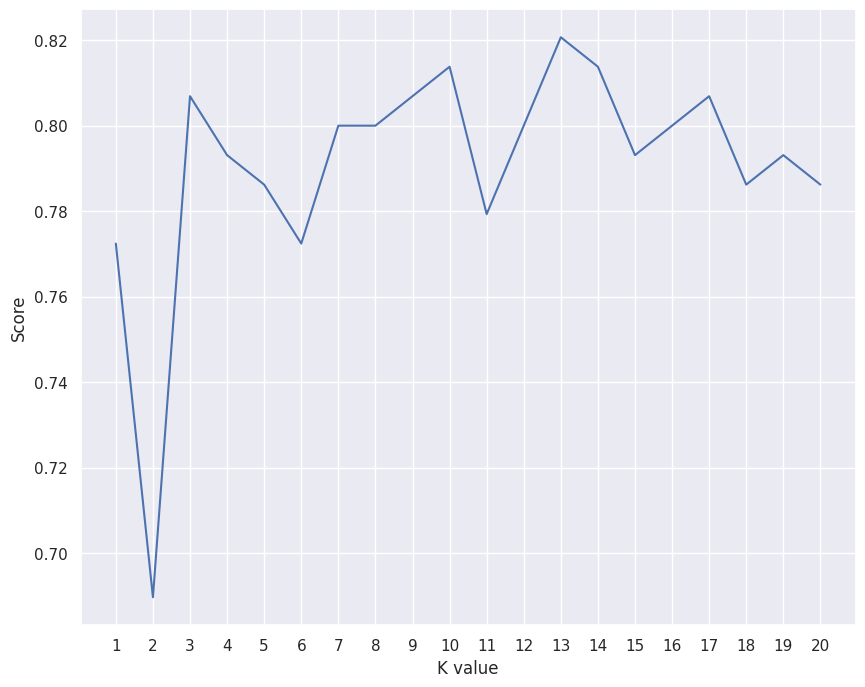

KNN best accuaracy: 82.07%


In [50]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()
KNAcc = max(scoreListknn)
print('KNN best accuaracy: {:.2f}%'.format(KNAcc*100))

In [52]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.68      0.81        71
        True       0.76      1.00      0.87        74

    accuracy                           0.84       145
   macro avg       0.88      0.84      0.84       145
weighted avg       0.88      0.84      0.84       145

[[48 23]
 [ 0 74]]


In [53]:
from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred, y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

SVC accuracy: 84.14%


In [54]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)

y_pred = NBclassifier1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.62      0.77        71
        True       0.73      1.00      0.85        74

    accuracy                           0.81       145
   macro avg       0.87      0.81      0.81       145
weighted avg       0.86      0.81      0.81       145

[[44 27]
 [ 0 74]]


In [55]:
from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred, y_test)
print('Categorical Native Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

Categorical Native Bayes accuracy: 81.38%


In [56]:
scoreListDT = []
for i in range(2,21):
  DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
  DTclassifier.fit(x_train, y_train)
  scoreListDT.append(DTclassifier.score(x_test, y_test))

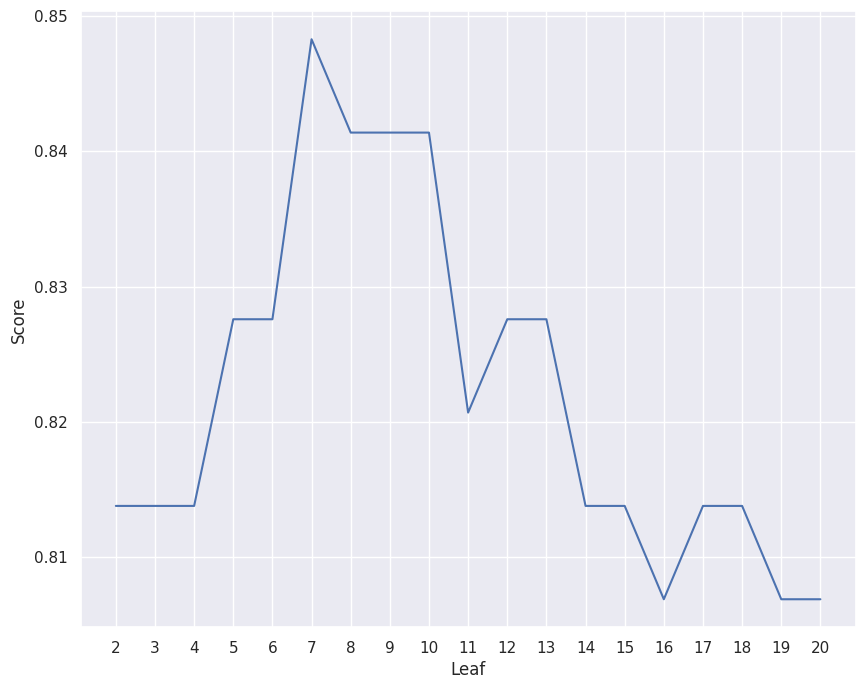

Decision Tree Accuracy: 84.83%


In [57]:
plt.figure(figsize=(10, 8))
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel('Leaf')
plt.ylabel('Score')
plt.show()
DTAcc = max(scoreListDT)
print('Decision Tree Accuracy: {:.2f}%'.format(DTAcc*100))

In [60]:
from sklearn.metrics import f1_score, accuracy_score
tree = ClassificationTree()
tree.fit(x_train, y_train)
print('Training finished')
y_pred = tree.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


Training finished
F1 Score 0.8054658385093167
Accuracy 0.8137931034482758


In [114]:
scoreListRF = []
for i in range(2,25):
  RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=i, max_leaf_nodes=i)
  RFclassifier.fit(x_train, y_train)
  scoreListRF.append(RFclassifier.score(x_test, y_test))

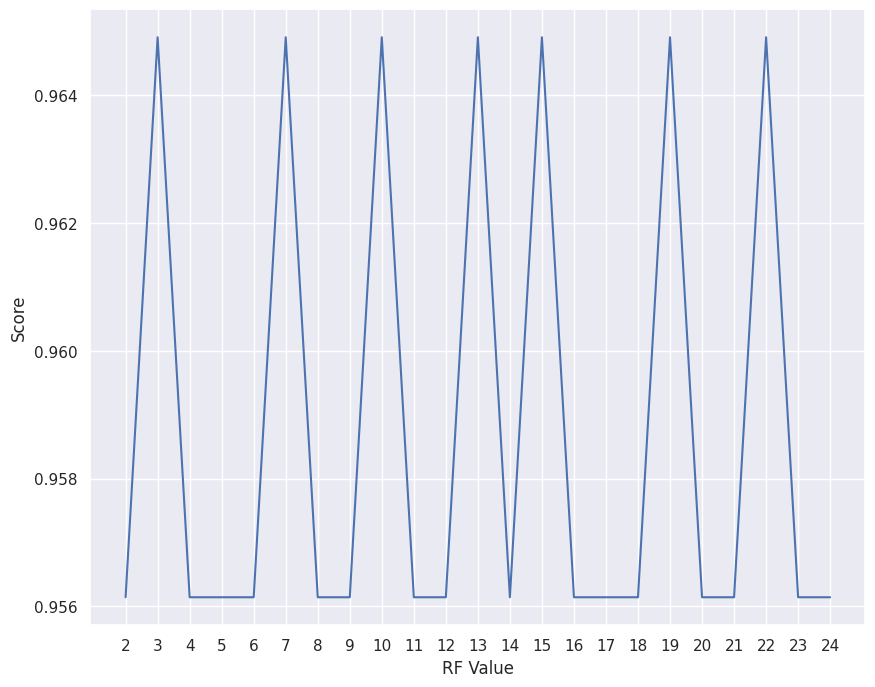

Random Forest Accuracy: 96.49%


In [116]:
plt.figure(figsize=(10, 8))
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel('RF Value')
plt.ylabel('Score')
plt.show()
RFAcc = max(scoreListRF)
print('Random Forest Accuracy: {:.2f}%'.format(RFAcc*100))

In [119]:
paramsGB = {'n_estimators':[100,200,300,400,500], 'max_depth':[1,2,3,4,5], 'subsample':[0.5,1], 'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [122]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [124]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=5, n_estimators=200,
                           subsample=0.5)
0.9695652173913043
{'subsample': 0.5, 'n_estimators': 200, 'max_leaf_nodes': 5, 'max_depth': 5}
5


In [125]:
GBclassifier = GradientBoostingClassifier(subsample=1, n_estimators=200, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[46  1]
 [ 2 65]]


In [126]:
from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred, y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

Gradient Boosting accuracy: 97.37%


In [128]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Decision Tree', 'Random Forest', 'Gradient Boost'], 'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc1*100, DTAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Gradient Boost,97.368421
5,Random Forest,96.491228
4,Decision Tree,84.827586
2,SVM,84.137931
0,Logistic Regression,83.448276
1,K Neighbors,82.068966
3,Categorical NB,81.379310
